
1. Импортируем все необходимые библиотеки
2. Загружаем датасет и присваиваем его переменной data.
3. Разделяем данные на обучающие и тестовые наборы(X_train, X_test, y_train, y_test)

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import pandas as pd
import random



data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Перекрестная проверка
Создание модели логистической регрессии(logreg)
Выводим результат 



In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, X_scaled, y, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())

Cross-validation scores: [0.98245614 0.98245614 0.97368421 0.97368421 0.99115044]
Average accuracy: 0.9806862288464524


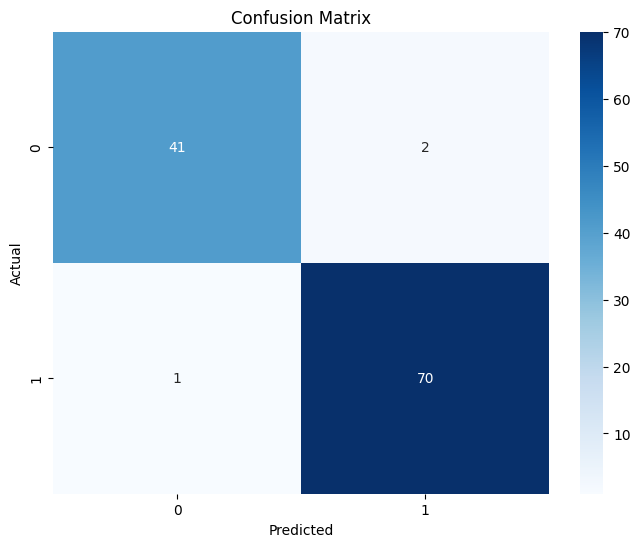

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=logreg.classes_, yticklabels=logreg.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


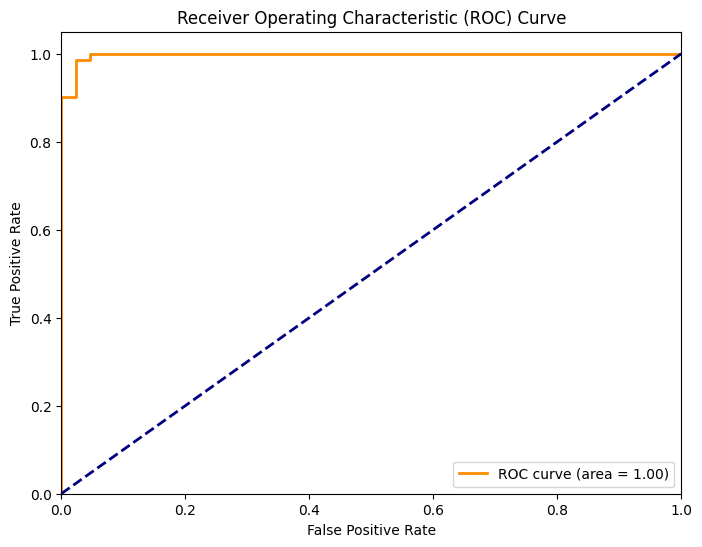

In [49]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Решетчатый поиск
Выводим размеры обучающих и тестовых наборов
Поиск наилучших параметров с использованием вложенных циклов
Выводим результат 

In [24]:
print("Размер обучающего набора: {}, размер тестового набора: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0
best_parameters = {'C': None, 'gamma': None}

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Наилучшее значение правильности: {:.2f}".format(best_score))
print("Наилучшие значения параметров: {}".format(best_parameters))


Размер обучающего набора: 455, размер тестового набора: 114
Наилучшее значение правильности: 0.93
Наилучшие значения параметров: {'C': 1, 'gamma': 0.001}


In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_
print("Важности признаков:", feature_importances)


Важности признаков: [0.04538598 0.01202493 0.03807726 0.03688077 0.00391502 0.00917314
 0.0777715  0.15437762 0.00452668 0.00741711 0.01131147 0.00402198
 0.01329144 0.04033434 0.0045934  0.00526661 0.00789265 0.00735257
 0.00421761 0.00558464 0.06447765 0.02186146 0.0736209  0.1048464
 0.01255259 0.01886026 0.02476076 0.16428464 0.0135446  0.007774  ]


IndexError: index 27 is out of bounds for axis 0 with size 3

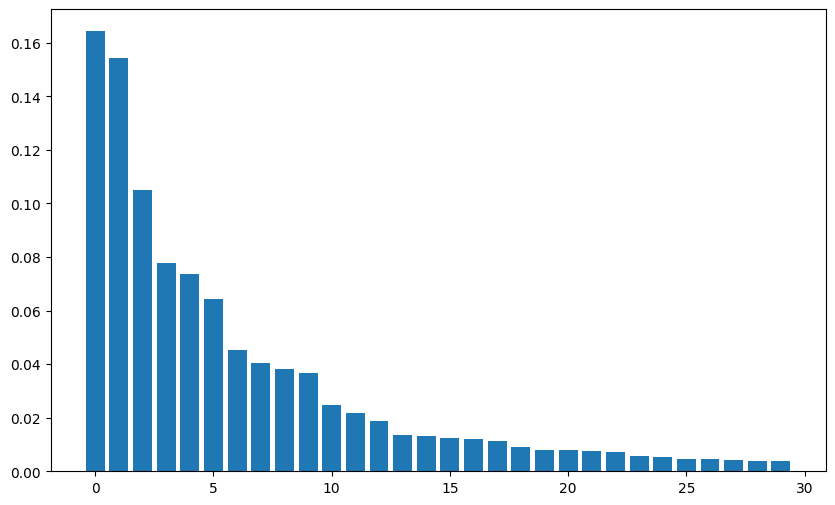

In [59]:
import numpy as np
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = ['признак1', 'признак2', ...] 

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.xlabel("Признаки")
plt.ylabel("Важность")
plt.title("Важность признаков")
plt.show()



In [60]:
best_svm = SVC(gamma=best_parameters['gamma'], C=best_parameters['C'])
scores = cross_val_score(best_svm, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Average accuracy:", scores.mean())


Cross-validation scores: [0.92307692 0.91208791 0.93406593 0.86813187 0.91208791]
Average accuracy: 0.9098901098901099


##### В данном коде модель обучается на обучающем наборе, а затем тестируется на тестовом наборе.
##### Мы модем преобразовать этот код так чтобы после обучения модели на обучающем наборе, параметры модели настраивались на проверочном наборе, а затем окончательное тестирование пройдет на тестовом наборе. Этот подход может быть более эффективным при выборе оптимальных параметров модели.

In [25]:
X_trainval, X_test, y_trainval, y_test = train_test_split(data.data, data.target, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("Размер обучающего набора: {} размер проверочного набора: {} размер тестового набора: {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)

print("Лучшее значение правильности на проверочном наборе: {:.2f}".format(best_score))
print("Наилучшие значения параметров: ", best_parameters)
print("Правильность на тестовом наборе с наилучшими параметрами: {:.2f}".format(test_score))


Размер обучающего набора: 319 размер проверочного набора: 107 размер тестового набора: 143
Лучшее значение правильности на проверочном наборе: 0.94
Наилучшие значения параметров:  {'C': 1, 'gamma': 0.001}
Правильность на тестовом наборе с наилучшими параметрами: 0.93


# Метрики качества моделей и их вычисление
Далее мы применим 2 классификатора(DummyClassifier и DecisionTreeClassifier)для предсказания меток на тестовом наборе данных.
**DummyClassifier** используется в качестве простого базового сравнения, предсказывая наиболее часто встречающуюся метку. Это полезно для установления базового уровня производительности модели. 
 **DecisionTreeClassifier** строит модель решающего дерева с ограниченной глубиной, учитывая более сложные зависимости между признаками и метками.


In [26]:
from sklearn. dummy import DummyClassifier
import numpy as np
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Уникальные спрогнозированные метки: {}". format(np. unique (pred_most_frequent)))
print ("Правильность на тестовом наборе: {:.2f}". format (dummy_majority. score(X_test, y_test)))

Уникальные спрогнозированные метки: [1]
Правильность на тестовом наборе: 0.63


In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Правильность на тестовом наборе собственной модели: {:.2f}".format(accuracy))


Правильность на тестовом наборе собственной модели: 0.96


In [62]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))
print("\nОтчет о классификации:\n", classification_report(y_test, y_pred))


Матрица ошибок:
 [[40  3]
 [ 1 70]]

Отчет о классификации:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


In [27]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier (max_depth=2). fit(X_train, y_train)
pred_tree = tree. predict (X_test)
print("Правильность на тестовом наборе: {:.2f}". format (tree.score(X_test, y_test)))

Правильность на тестовом наборе: 0.93


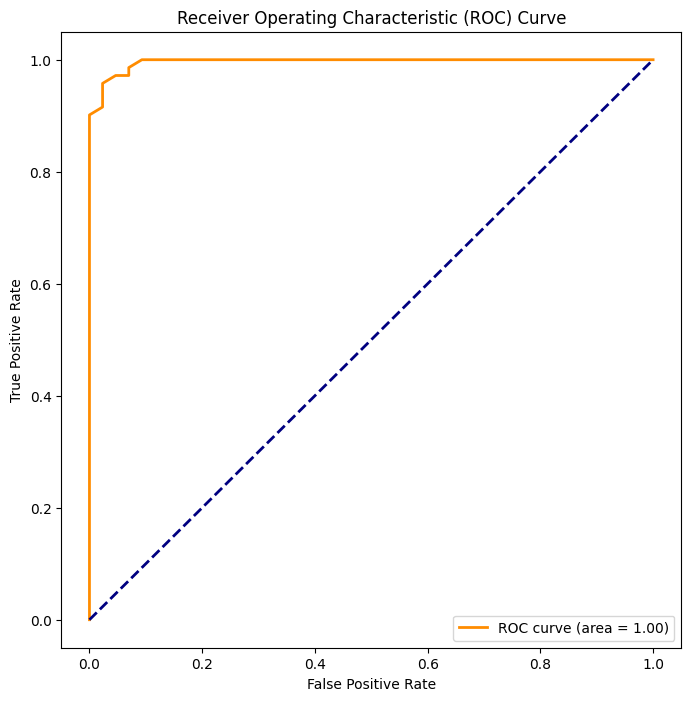

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Получение вероятностей положительного класса
y_prob = clf.predict_proba(X_test)[:, 1]

# Рассчитываем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Вычисляем AUC
roc_auc = auc(fpr, tpr)

# Визуализация ROC-кривой
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## ---------------------------------------------------------------------------------------------------------

#### Используя библиотеки pandas и random мы сгенерируем случайные данные ( 1.зарплата 2.город проживания 3.возраст 4.предпочтение отпуска 5.предпочтение транспорта 6. город, в котором человек хочет провести отпуск)

In [34]:
random.seed(42)

data = {
    'salary': [random.randint(10000, 100000) for i in range(1000)],
    'city': [random.choice(['Bishkek', 'Seoul', 'Naryn']) for i in range(1000)],
    'age': [random.randint(30, 65) for i in range(1000)],
    'vacation_prefer': [random.choice(['Beach', 'Mountains']) for i in range(1000)],
    'transport_prefer': [random.choice(['auto', 'plane']) for i in range(1000)],
    'target': [random.choice(['Paris', 'LA', 'Tokio']) for i in range(1000)]
}

df = pd.DataFrame(data)


#### Преобразовываем категориальных данных в числовые используя pd.get_dummies

In [35]:
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer'], drop_first=True)

####  Разделение данных на обучающую и тестовую выборки

In [36]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 #### Создаем экземпляр RandomForestClassifier, и обучаем ее на обучающей выборке с использованием метода fit
  #### Выводим результат

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.42
Classification Report:
               precision    recall  f1-score   support

          LA       0.41      0.41      0.41        68
       Paris       0.48      0.43      0.45        67
       Tokio       0.40      0.43      0.41        65

    accuracy                           0.42       200
   macro avg       0.43      0.43      0.43       200
weighted avg       0.43      0.42      0.43       200


#### Визуализируем данные

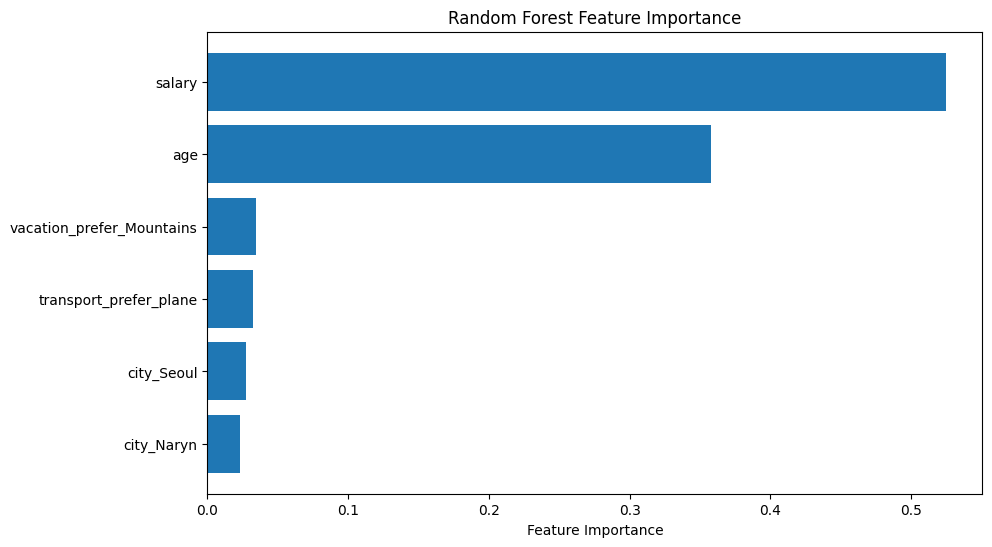

In [38]:
import matplotlib.pyplot as plt

# Визуализация важности признаков
feature_importance = model.feature_importances_
features = X_train.columns
indices = sorted(range(len(feature_importance)), key=lambda k: feature_importance[k])

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[indices], align='center')
plt.yticks(range(len(feature_importance)), [features[i] for i in indices])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()
